In [2]:
import sys
sys.path.append("../")

import torch

from tdoa.visualization import plot_mics_and_sources
from neural_tdoa.model import TdoaCrnn10
from neural_tdoa.utils.load_config import load_config
from datasets.dataset import TdoaDataset


def load_model():
    model = TdoaCrnn10()
    
    weights = torch.load("../tests/fixtures/weights.pth",
                         map_location=torch.device('cpu'))
    #breakpoint()
    model.load_state_dict(weights)
    model.eval()

    return model

def eval_model(model, x):
    with torch.no_grad():
        return model(x)

model = load_model()
config = load_config()
dataset = TdoaDataset(config["validation_dataset"])

100%|███████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.58it/s]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

output_dicts = []

def error(y_gt, y_pred):
    return np.sqrt((y_gt - y_pred)**2)
for sample in dataset:
    x,y = sample
    prediction = float(eval_model(model, x.unsqueeze(0)).numpy())
    gt = float(y["target"].numpy())
    error_val = error(gt, prediction)
    print(f"ground_truth: {gt} prediction: {prediction}, error: {error_val}")
    
    y["prediction"] = prediction
    y["error"] = error_val
    output_dicts.append(y)
    
#     room_dims = eval(sample[0]["room_dims"])
#     mics = eval(sample[0]["mic_coordinates"])
#     sources = [eval(sample[0]["source_coordinates"])]
#     plot_mics_and_sources(room_dims, mics, sources)
#     plt.show()

output_dicts.sort(key=lambda x: x["error"], reverse=True)


ground_truth: 0.9256247282028198 prediction: 0.8607282042503357, error: 0.06489652395248413
ground_truth: 0.18209043145179749 prediction: 0.1556979864835739, error: 0.026392444968223572
ground_truth: 0.1909213364124298 prediction: 0.7327837347984314, error: 0.5418623983860016
ground_truth: 0.5646778345108032 prediction: 0.49976736307144165, error: 0.06491047143936157
ground_truth: 0.9922879338264465 prediction: 0.9109216332435608, error: 0.08136630058288574
ground_truth: 0.3037469983100891 prediction: 0.5122078061103821, error: 0.20846080780029297
ground_truth: 0.08009961992502213 prediction: 0.18993008136749268, error: 0.10983046144247055
ground_truth: 0.6218193769454956 prediction: 0.6491814851760864, error: 0.02736210823059082
ground_truth: 0.7654472589492798 prediction: 0.7917555570602417, error: 0.026308298110961914
ground_truth: 0.7313418984413147 prediction: 0.8669446706771851, error: 0.13560277223587036
ground_truth: 0.9998229742050171 prediction: 0.8972553610801697, error: 0.1

ground_truth: 0.4983600080013275 prediction: 0.4937925934791565, error: 0.0045674145221710205
ground_truth: 0.3107478618621826 prediction: 0.36113619804382324, error: 0.050388336181640625
ground_truth: 0.8354764580726624 prediction: 0.8454263806343079, error: 0.009949922561645508
ground_truth: 0.8876285552978516 prediction: 0.8502106070518494, error: 0.0374179482460022
ground_truth: 0.05355219915509224 prediction: 0.6296952366828918, error: 0.5761430375277996
ground_truth: 0.0021189700346440077 prediction: 0.14162178337574005, error: 0.13950281334109604
ground_truth: 9.631282591726631e-05 prediction: 0.1581214964389801, error: 0.15802518361306284
ground_truth: 0.1413147747516632 prediction: 0.22235345840454102, error: 0.08103868365287781
ground_truth: 0.7932809591293335 prediction: 0.8410940170288086, error: 0.0478130578994751
ground_truth: 0.3235144019126892 prediction: 0.6943615078926086, error: 0.37084710597991943
ground_truth: 0.8773576617240906 prediction: 0.8244852423667908, erro

Error mean: 0.13502674516654906 Error std: 0.11918578747264545
Prediction 0.6296952366828918, Error: 0.5761430375277996, delay_in_ms: 9.924975395202637


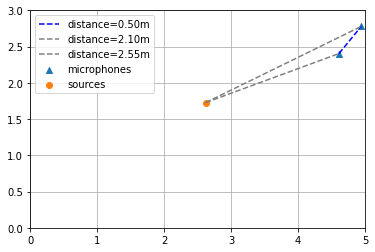

Prediction 0.7327837347984314, Error: 0.5418623983860016, delay_in_ms: 2.216916799545288


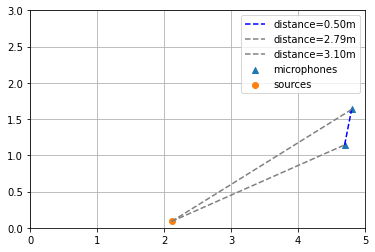

Prediction 0.5254573822021484, Error: 0.5055221188813448, delay_in_ms: 4.691668510437012


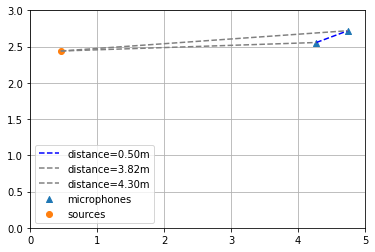

Prediction 0.5635979175567627, Error: 0.48224247246980667, delay_in_ms: 3.681079864501953


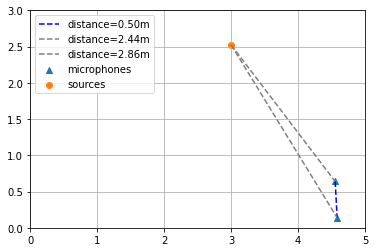

Prediction 0.6523246169090271, Error: 0.45434194803237915, delay_in_ms: 1.300049066543579


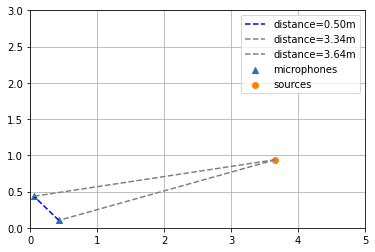

Prediction 0.5827767848968506, Error: 0.41376179456710815, delay_in_ms: 7.974427223205566


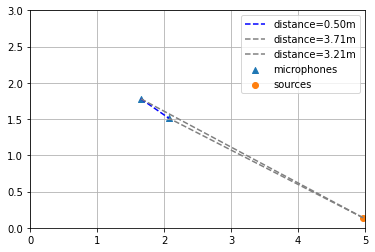

Prediction 0.6943615078926086, Error: 0.37084710597991943, delay_in_ms: 7.981607913970947


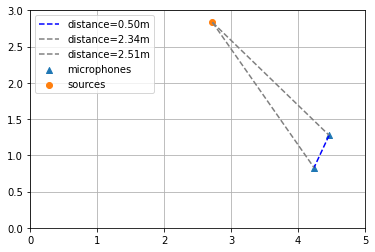

Prediction 0.420052170753479, Error: 0.2986663579940796, delay_in_ms: 2.7322568893432617


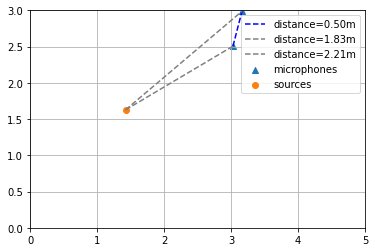

Prediction 0.30519092082977295, Error: 0.29631727933883667, delay_in_ms: 8.47134780883789


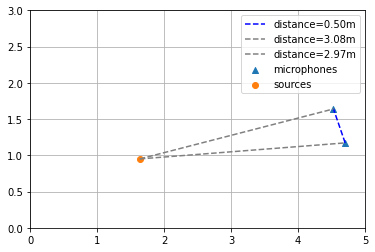

Prediction 0.6650694012641907, Error: 0.28547805547714233, delay_in_ms: 9.071537017822266


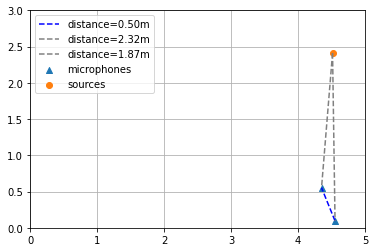

Prediction 0.5584959983825684, Error: 0.27021700143814087, delay_in_ms: 7.046056270599365


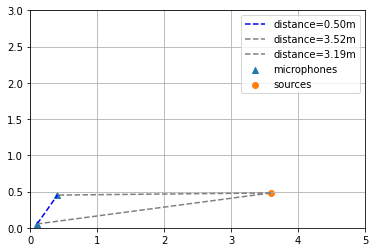

Prediction 0.42517468333244324, Error: 0.2673439681529999, delay_in_ms: 5.799327373504639


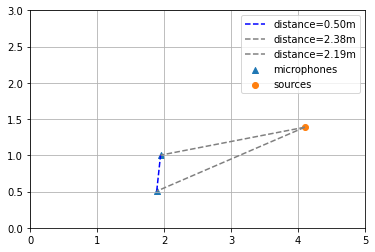

Prediction 0.25764742493629456, Error: 0.2499470147304237, delay_in_ms: 0.4538806080818176


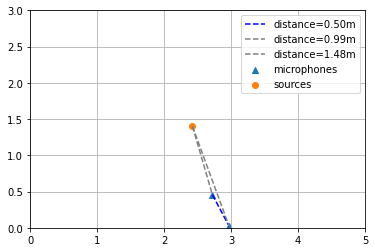

Prediction 0.6795490980148315, Error: 0.24898993968963623, delay_in_ms: 2.9348950386047363


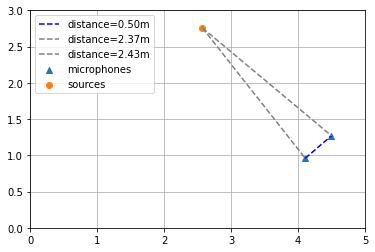

Prediction 0.46074357628822327, Error: 0.24242347478866577, delay_in_ms: 0.20374028384685516


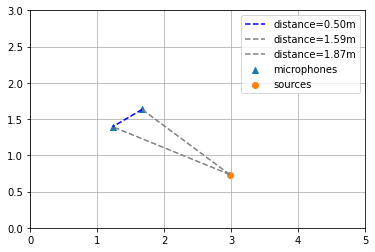

Prediction 0.22210060060024261, Error: 0.2220986157196876, delay_in_ms: 1.7324211597442627


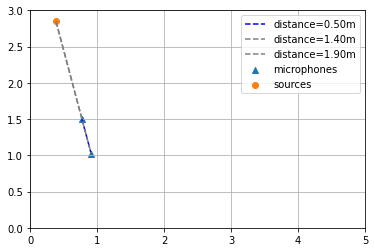

Prediction 0.8061206936836243, Error: 0.21699988842010498, delay_in_ms: 5.511704921722412


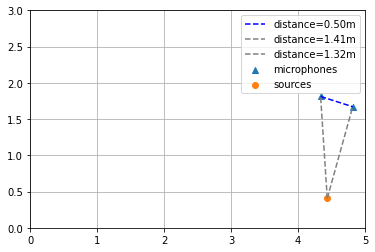

Prediction 0.5122078061103821, Error: 0.20846080780029297, delay_in_ms: 5.875805854797363


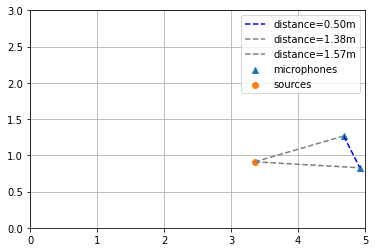

Prediction 0.502056896686554, Error: 0.2054225206375122, delay_in_ms: 2.5059540271759033


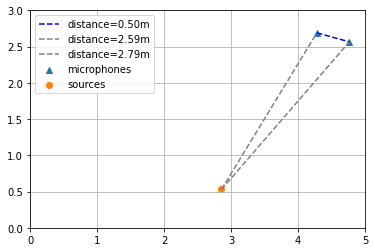

Prediction 0.27497684955596924, Error: 0.20358526706695557, delay_in_ms: 5.245095729827881


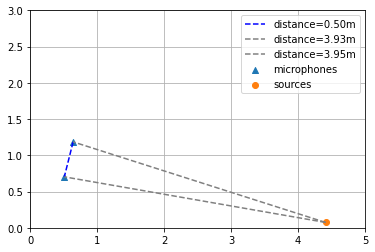

Prediction 0.6250022649765015, Error: 0.19142434000968933, delay_in_ms: 3.0549588203430176


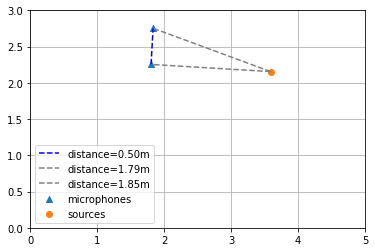

Prediction 0.5768085718154907, Error: 0.18264105916023254, delay_in_ms: 4.260907173156738


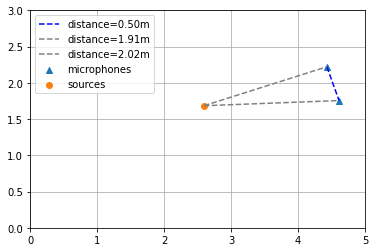

Prediction 0.4459770619869232, Error: 0.18194708228111267, delay_in_ms: 4.737709999084473


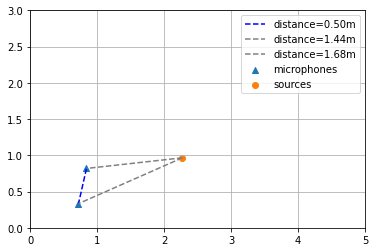

Prediction 0.8180580139160156, Error: 0.1748635172843933, delay_in_ms: 3.4607791900634766


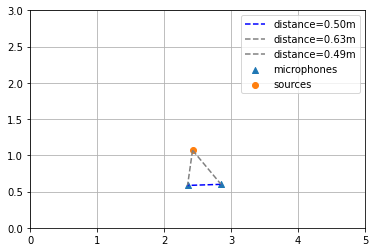

Prediction 0.8105411529541016, Error: 0.1740931272506714, delay_in_ms: 3.3010716438293457


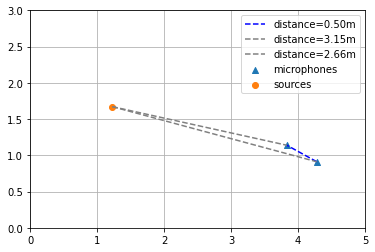

Prediction 0.1840045005083084, Error: 0.17251132428646088, delay_in_ms: 5.844608783721924


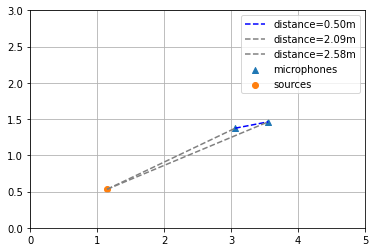

Prediction 0.8269559144973755, Error: 0.16867047548294067, delay_in_ms: 6.6777873039245605


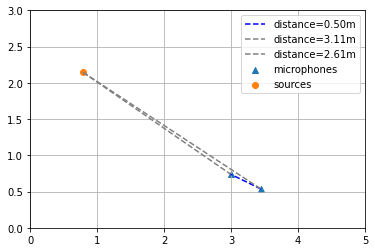

Prediction 0.8648425936698914, Error: 0.16754144430160522, delay_in_ms: 8.993932723999023


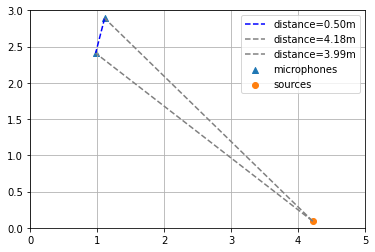

Prediction 0.1581214964389801, Error: 0.15802518361306284, delay_in_ms: 2.657292127609253


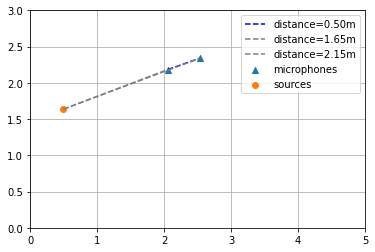

Prediction 0.18725106120109558, Error: 0.1556638441979885, delay_in_ms: 3.5681874752044678


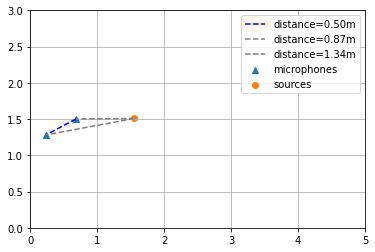

Prediction 0.32725217938423157, Error: 0.15456324815750122, delay_in_ms: 7.89767599105835


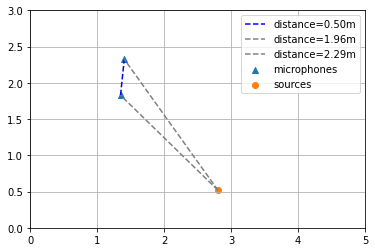

Prediction 0.480655312538147, Error: 0.14622169733047485, delay_in_ms: 0.10506151616573334


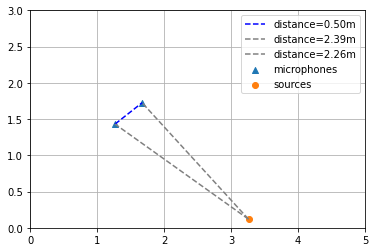

Prediction 0.834145188331604, Error: 0.14305561780929565, delay_in_ms: 6.618344306945801


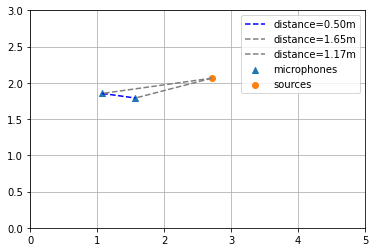

Prediction 0.844504714012146, Error: 0.14057117700576782, delay_in_ms: 9.060843467712402


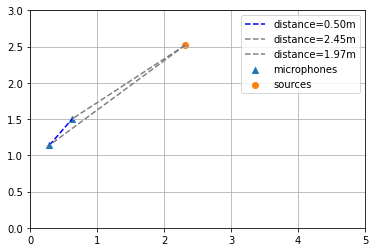

Prediction 0.8360154032707214, Error: 0.14022135734558105, delay_in_ms: 6.4850640296936035


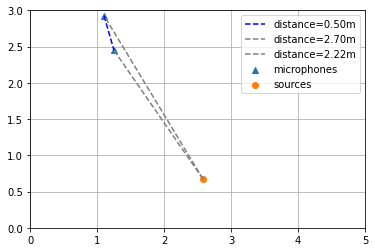

Prediction 0.14162178337574005, Error: 0.13950281334109604, delay_in_ms: 4.645715713500977


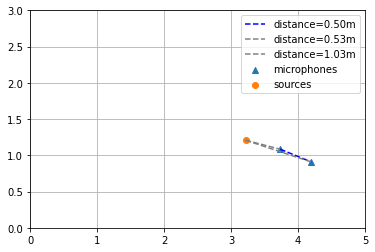

Prediction 0.5292581915855408, Error: 0.13875722885131836, delay_in_ms: 4.479022026062012


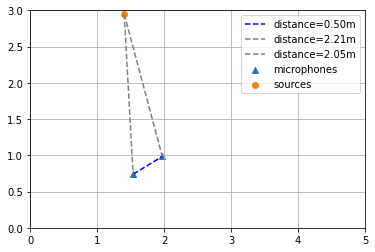

Prediction 0.8669446706771851, Error: 0.13560277223587036, delay_in_ms: 2.3217613697052


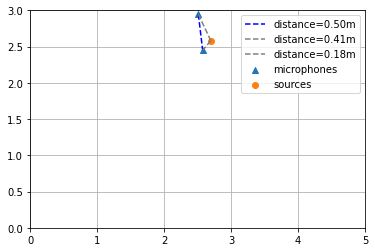

Prediction 0.8394040465354919, Error: 0.1241258978843689, delay_in_ms: 9.737751960754395


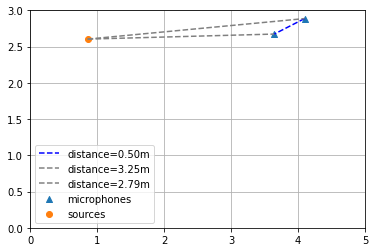

Prediction 0.7427363395690918, Error: 0.12234944105148315, delay_in_ms: 9.461270332336426


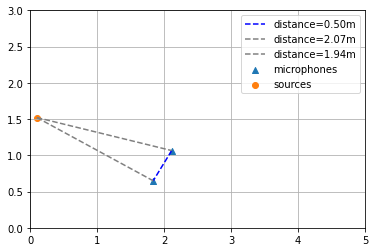

Prediction 0.49996209144592285, Error: 0.11743038892745972, delay_in_ms: 3.532275676727295


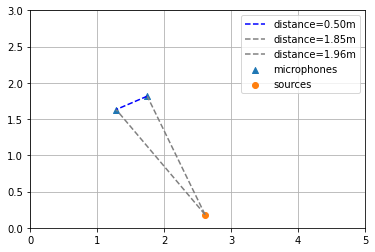

Prediction 0.8161540031433105, Error: 0.11701542139053345, delay_in_ms: 1.3861974477767944


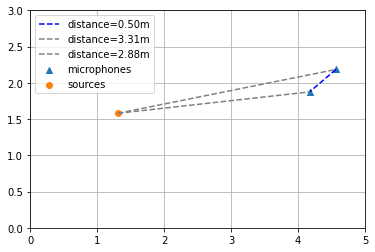

Prediction 0.8791965842247009, Error: 0.11608278751373291, delay_in_ms: 1.6738344430923462


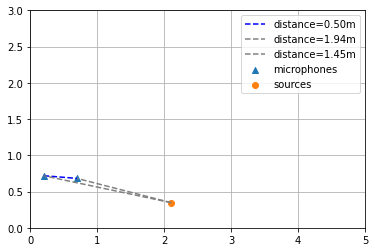

Prediction 0.15603041648864746, Error: 0.11515389755368233, delay_in_ms: 7.487734794616699


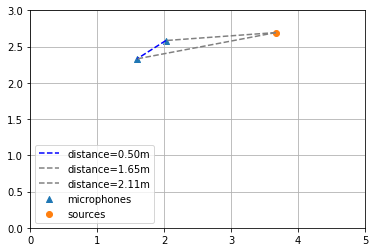

Prediction 0.18993008136749268, Error: 0.10983046144247055, delay_in_ms: 4.143139839172363


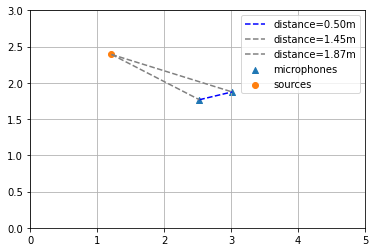

Prediction 0.8638819456100464, Error: 0.10905444622039795, delay_in_ms: 0.08480262756347656


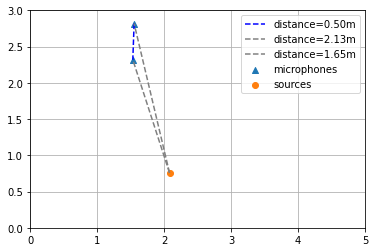

Prediction 0.8491448760032654, Error: 0.10696989297866821, delay_in_ms: 4.533096790313721


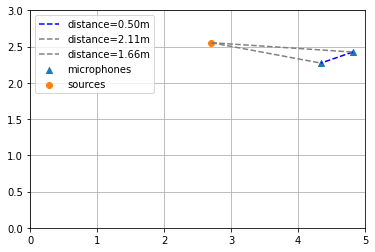

Prediction 0.6686211824417114, Error: 0.10659134387969971, delay_in_ms: 6.151860237121582


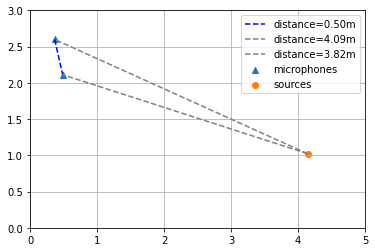

Prediction 0.5976812243461609, Error: 0.10455286502838135, delay_in_ms: 8.3770112991333


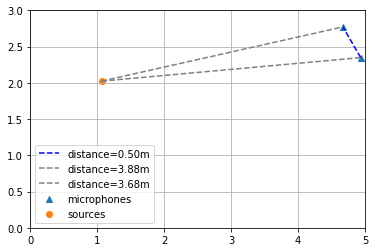

Prediction 0.3865728974342346, Error: 0.10374310612678528, delay_in_ms: 2.690692186355591


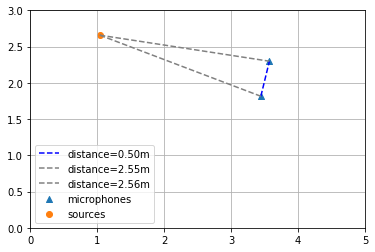

Prediction 0.8972553610801697, Error: 0.10256761312484741, delay_in_ms: 0.05709129571914673


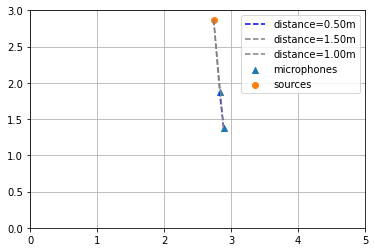

Prediction 0.7749044299125671, Error: 0.09945440292358398, delay_in_ms: 9.695947647094727


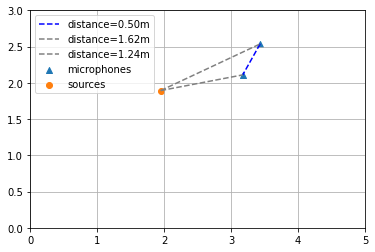

Prediction 0.2562738358974457, Error: 0.09870670735836029, delay_in_ms: 1.251290202140808


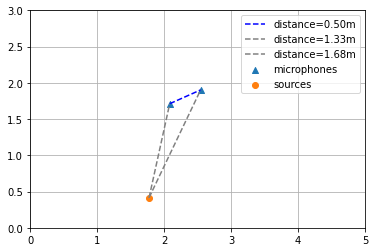

Prediction 0.7332489490509033, Error: 0.09491872787475586, delay_in_ms: 4.908092975616455


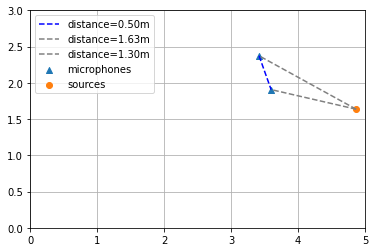

Prediction 0.15303650498390198, Error: 0.09323341771960258, delay_in_ms: 6.530670166015625


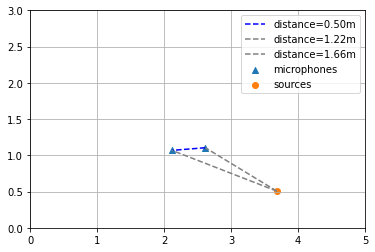

Prediction 0.8989198803901672, Error: 0.09250503778457642, delay_in_ms: 6.8341288566589355


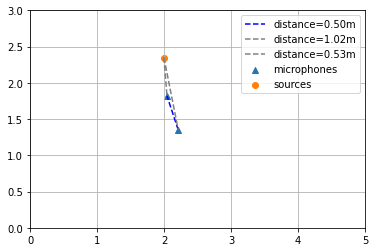

Prediction 0.5521920323371887, Error: 0.08898180723190308, delay_in_ms: 1.941186547279358


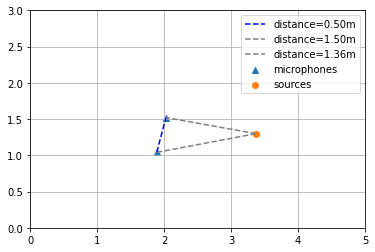

Prediction 0.8207982182502747, Error: 0.08825933933258057, delay_in_ms: 6.006790637969971


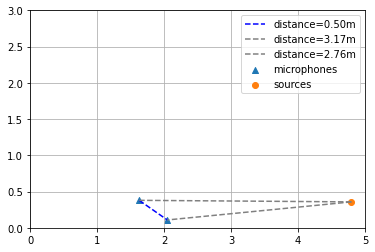

Prediction 0.8882919549942017, Error: 0.08422565460205078, delay_in_ms: 2.090909957885742


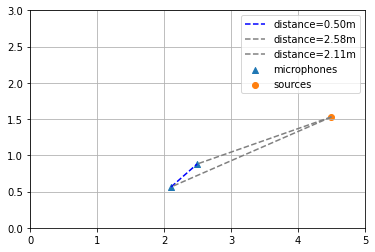

Prediction 0.8913440108299255, Error: 0.08390086889266968, delay_in_ms: 5.287017345428467


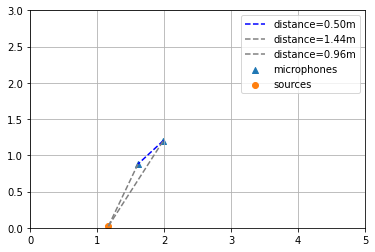

Prediction 0.9109216332435608, Error: 0.08136630058288574, delay_in_ms: 3.326951742172241


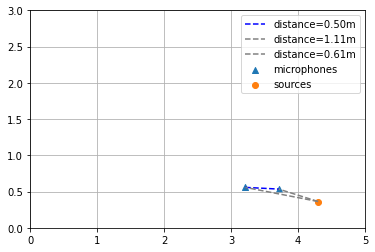

Prediction 0.22235345840454102, Error: 0.08103868365287781, delay_in_ms: 6.432389259338379


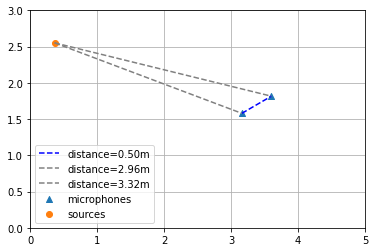

Prediction 0.4593338966369629, Error: 0.08052608370780945, delay_in_ms: 8.37868595123291


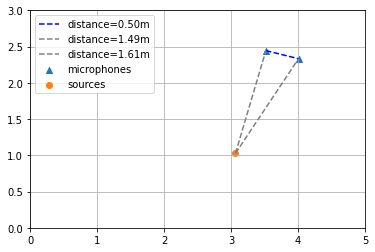

Prediction 0.12758374214172363, Error: 0.07916048169136047, delay_in_ms: 7.585605144500732


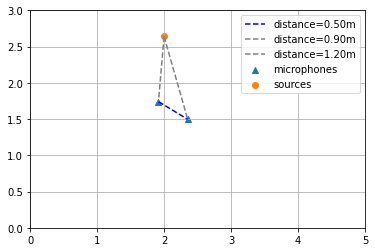

Prediction 0.10161564499139786, Error: 0.07728640362620354, delay_in_ms: 0.8323413729667664


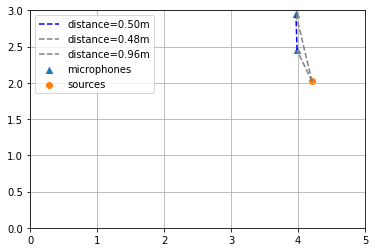

Prediction 0.8536560535430908, Error: 0.07726180553436279, delay_in_ms: 0.4070868492126465


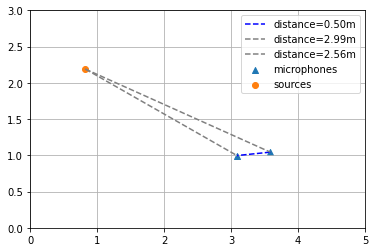

Prediction 0.17258356511592865, Error: 0.07259538769721985, delay_in_ms: 7.012826919555664


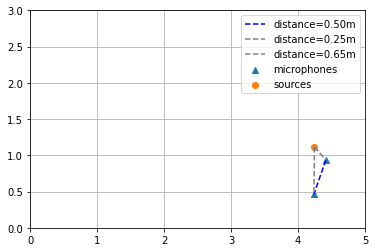

Prediction 0.7181571125984192, Error: 0.07155543565750122, delay_in_ms: 6.337325096130371


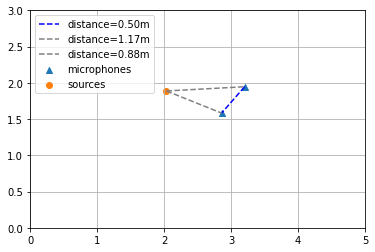

Prediction 0.8944260478019714, Error: 0.0703885555267334, delay_in_ms: 7.757572650909424


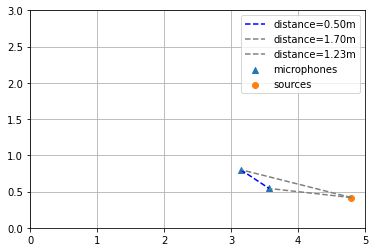

Prediction 0.38816675543785095, Error: 0.06573227047920227, delay_in_ms: 1.6562952995300293


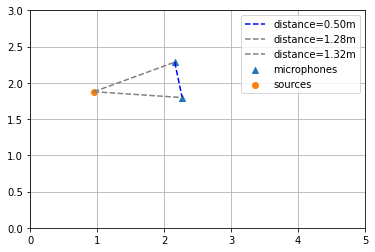

Prediction 0.49976736307144165, Error: 0.06491047143936157, delay_in_ms: 0.2148970514535904


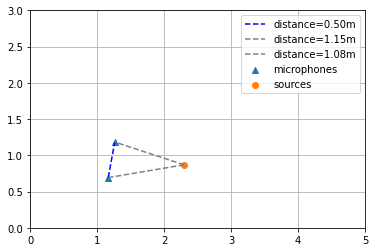

Prediction 0.8607282042503357, Error: 0.06489652395248413, delay_in_ms: 4.494910717010498


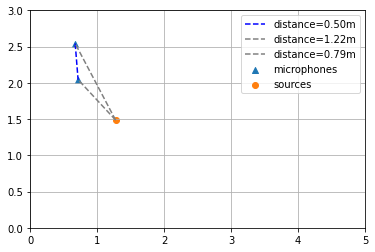

Prediction 0.1121521070599556, Error: 0.06029368191957474, delay_in_ms: 0.6951537728309631


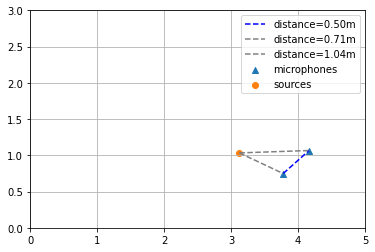

Prediction 0.49662017822265625, Error: 0.05697411298751831, delay_in_ms: 8.888761520385742


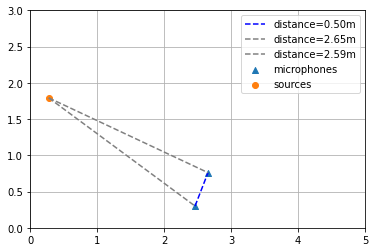

Prediction 0.9002914428710938, Error: 0.056310415267944336, delay_in_ms: 8.027114868164062


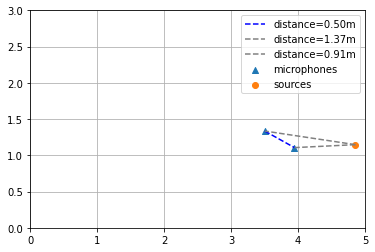

Prediction 0.8244852423667908, Error: 0.052872419357299805, delay_in_ms: 8.826969146728516


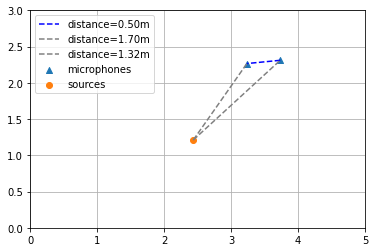

Prediction 0.9020779728889465, Error: 0.05258387327194214, delay_in_ms: 7.921847343444824


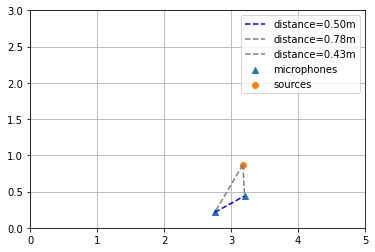

Prediction 0.6105829477310181, Error: 0.05108529329299927, delay_in_ms: 0.2762289047241211


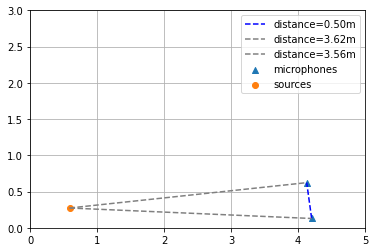

Prediction 0.19427503645420074, Error: 0.050436750054359436, delay_in_ms: 8.816629409790039


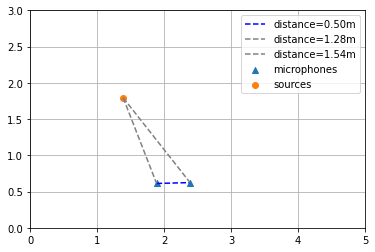

Prediction 0.36113619804382324, Error: 0.050388336181640625, delay_in_ms: 0.9738008975982666


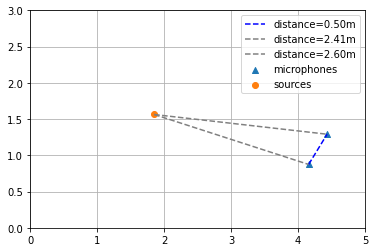

Prediction 0.6583383679389954, Error: 0.0499190092086792, delay_in_ms: 4.78826904296875


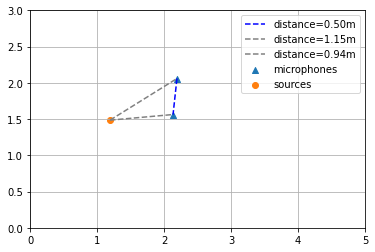

Prediction 0.8410940170288086, Error: 0.0478130578994751, delay_in_ms: 8.91281509399414


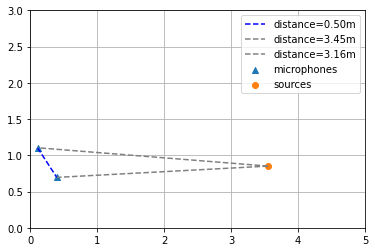

Prediction 0.5423069000244141, Error: 0.037688374519348145, delay_in_ms: 8.755342483520508


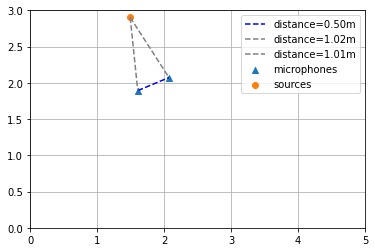

Prediction 0.8502106070518494, Error: 0.0374179482460022, delay_in_ms: 4.79697847366333


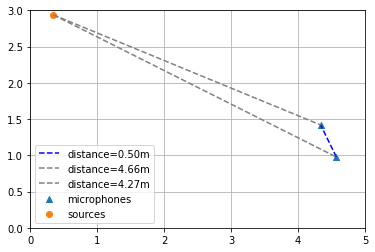

Prediction 0.44523441791534424, Error: 0.03077852725982666, delay_in_ms: 4.387730598449707


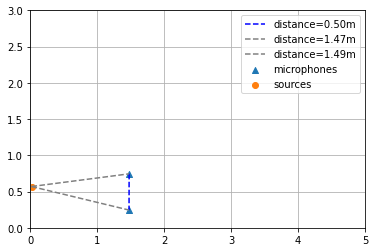

Prediction 0.6491814851760864, Error: 0.02736210823059082, delay_in_ms: 7.784426212310791


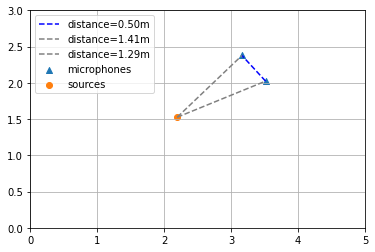

Prediction 0.2992379665374756, Error: 0.027153849601745605, delay_in_ms: 7.211153030395508


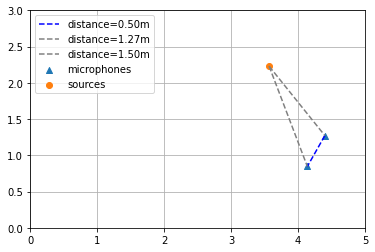

Prediction 0.28089070320129395, Error: 0.0271376371383667, delay_in_ms: 0.9168312549591064


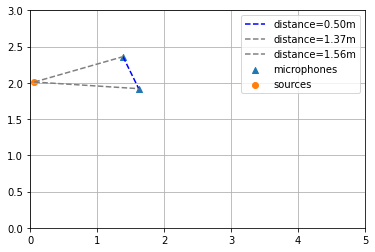

Prediction 0.1556979864835739, Error: 0.026392444968223572, delay_in_ms: 2.2876222133636475


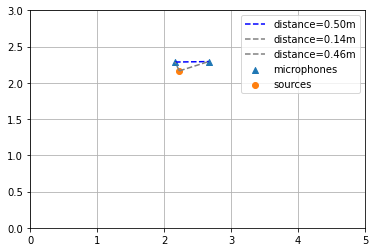

Prediction 0.7917555570602417, Error: 0.026308298110961914, delay_in_ms: 5.931837558746338


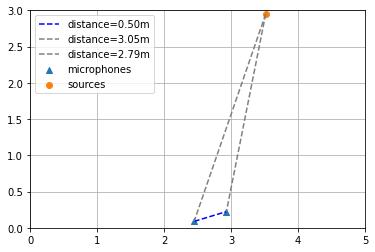

Prediction 0.8225484490394592, Error: 0.02443993091583252, delay_in_ms: 1.1807153224945068


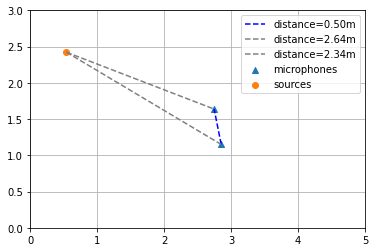

Prediction 0.24274154007434845, Error: 0.02377951145172119, delay_in_ms: 7.2546515464782715


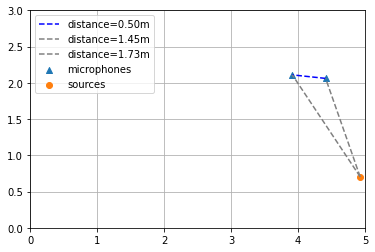

Prediction 0.6028130054473877, Error: 0.02235013246536255, delay_in_ms: 2.6458325386047363


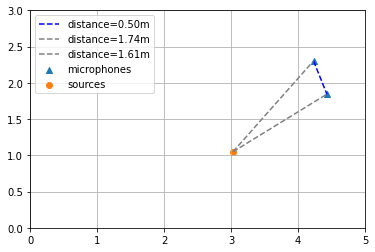

Prediction 0.40046021342277527, Error: 0.021245718002319336, delay_in_ms: 0.18092983961105347


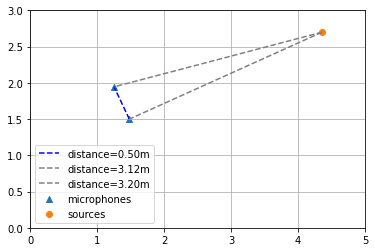

Prediction 0.40324804186820984, Error: 0.018185466527938843, delay_in_ms: 5.644468307495117


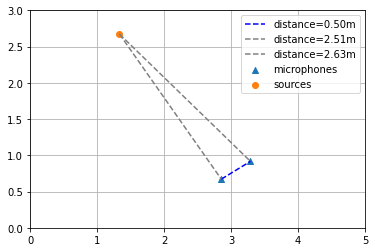

Prediction 0.20089265704154968, Error: 0.010606691241264343, delay_in_ms: 0.48197343945503235


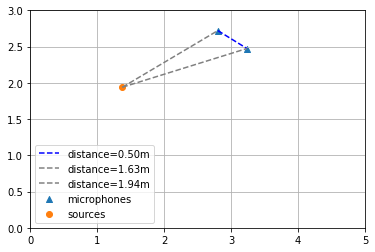

Prediction 0.8454263806343079, Error: 0.009949922561645508, delay_in_ms: 5.010568618774414


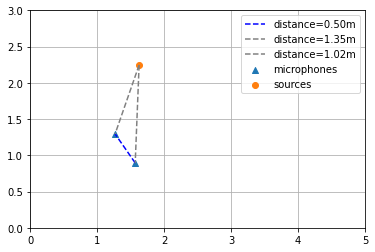

Prediction 0.8708363175392151, Error: 0.0054340362548828125, delay_in_ms: 9.698132514953613


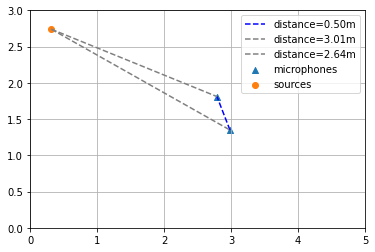

Prediction 0.4937925934791565, Error: 0.0045674145221710205, delay_in_ms: 7.012862682342529


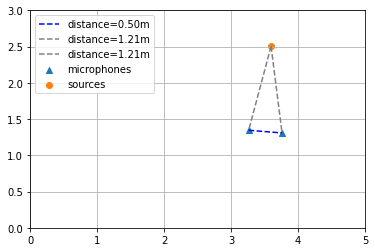

Prediction 0.3318147361278534, Error: 0.0002792477607727051, delay_in_ms: 6.2003374099731445


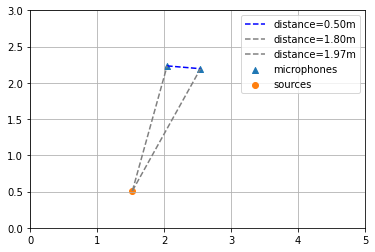

In [4]:
errors = [d["error"] for d in output_dicts]
avg_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error mean: {avg_error} Error std: {std_error}")

for d in output_dicts:
    delay_in_ms = d['mic_delays'][1]*1000
    print(f"Prediction {d['prediction']}, Error: {d['error']}, delay_in_ms: {delay_in_ms}")
    room_dims = d["room_dims"]
    mics = d["mic_coordinates"]
    sources = [d["source_coordinates"]]
    plot_mics_and_sources(room_dims, mics, sources)
    plt.show()

In [ ]:
output_dicts[0]